In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#  데이터 불러오고 전처리

In [2]:
# 유동인구 데이터 불러오기

f = pd.read_csv("fpopl.csv")
df = pd.DataFrame(f)
df.shape

(47546443, 6)

In [3]:
# 행정동 데이터 불러오기

f2 = pd.read_csv("adstrd_master.csv")
df2 = pd.DataFrame(f2)

df2.shape

(3493, 4)

In [4]:
# df와 df2 합치기 (유동인구['adstrd_code'] = 행정동['adstrd_code'])
#                          * adstrd_code = 행정동코드
# 유동인구 데이터와 행정동 이름 합침
# SQL의 LEFT JOIN

move_people = pd.merge(df,df2,on="adstrd_code",how="left")
move_people.head()

,base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt,adstrd_nm,brtc_nm,signgu_nm
0,20200101,0,M,age_00,11650560,15,반포1동,서울특별시,서초구
1,20200101,0,M,age_00,11590620,6,사당1동,서울특별시,동작구
2,20200101,0,M,age_00,11560710,4,대림2동,서울특별시,영등포구
3,20200101,0,M,age_00,11470680,12,신정7동,서울특별시,양천구
4,20200101,0,M,age_00,11350665,6,상계3.4동,서울특별시,노원구


In [5]:
move_people = move_people.rename({'base_ymd':'년월일','tmzon_se_code':'시간대','sexdstn_se_code':'성별','agrde_se_code':'나이대','adstrd_code':'행정동코드','popltn_cascnt':'유동인구','adstrd_nm':'행정동','signgu_nm':'행정구'}, axis ='columns')

In [6]:
grouped = move_people.groupby(by = ['년월일']).sum()['유동인구'].reset_index()
# 행정동별, 행정구별, 시간대별, 날짜별 _유동인구
grouped

,년월일,유동인구
0,20200101,45208028
1,20200102,55749874
2,20200103,59151121
3,20200104,54474173
4,20200105,46903976
...,...,...
163,20200612,60942009
164,20200613,54872785
165,20200614,46161661
166,20200615,58717583


In [7]:
!pip install scikit-learn

In [8]:
from sklearn.preprocessing import scale

In [9]:
grouped['유동인구_표준화'] = scale(grouped['유동인구'])

In [10]:
grouped_avg = grouped.mean()
grouped_avg[1]

52839332.98214286

In [11]:
grouped['유동인구_평균대비_증감률'] = (grouped['유동인구']-grouped_avg[1])/grouped_avg[1]*100
seoul = grouped

In [12]:
path = './'

case = p_info = pd.read_csv(path+'Case.csv')
p_info = pd.read_csv(path+'PatientInfo_20200717.csv')
#p_route = pd.read_csv(path+'PatientRoute.csv')
time = pd.read_csv(path+'Time.csv')
t_age = pd.read_csv(path+'TimeAge.csv')
t_gender = pd.read_csv(path+'TimeGender.csv')
t_provin = pd.read_csv(path+'TimeProvince.csv')
region = pd.read_csv(path+'Region.csv')
weather = pd.read_csv(path+'Weather.csv')
search = pd.read_csv(path+'SearchTrend.csv')
floating = pd.read_csv(path+'SeoulFloating.csv')
policy = pd.read_csv(path+'Policy.csv')

In [13]:
t_provin_Seoul = t_provin.groupby(by=['date','province']).sum()['confirmed'].reset_index()
t_provin_Seoul = t_provin_Seoul.loc[t_provin_Seoul['province']=='Seoul']
t_provin_Seoul = t_provin_Seoul.rename({'confirmed':'총확진자'},axis = 'columns')
t_provin_Seoul = t_provin_Seoul.drop('province',axis=1)
t_provin_Seoul['일일확진자'] = t_provin_Seoul['총확진자']
t_provin_Seoul

,date,총확진자,일일확진자
15,2020-01-20,0,0
32,2020-01-21,0,0
49,2020-01-22,0,0
66,2020-01-23,0,0
83,2020-01-24,0,0
...,...,...,...
2701,2020-06-26,1267,1267
2718,2020-06-27,1284,1284
2735,2020-06-28,1298,1298
2752,2020-06-29,1305,1305


In [14]:
my_list = np.array(t_provin_Seoul['총확진자'])
new_list = np.ones((len(my_list)),dtype = np.int64)

for i in range(len(my_list)):
    if i == 0:
        new_list[i]=my_list[i]
    else:
        new_list[i] = my_list[i]-my_list[i-1]
new_list

array([ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  2,  1,  0,  1,  0,  0,  0,
        5,  1,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  2,  5,  3,
        1,  4,  6,  8,  7,  6, 15, 10,  4,  7,  1,  4,  2,  3, 12, 10, 11,
       52, 19, 13, 13,  9,  6, 12,  5, 12, 17, 15, 10,  6,  4, 13, 13, 12,
       18, 20, 16, 24, 24, 14, 18, 22, 24, 11,  4, 11, 12,  5,  4,  3,  8,
        2,  5,  2,  2,  1,  2,  0,  2,  2,  0,  0,  1,  0,  0,  4,  0,  0,
        1,  1,  2,  0,  0,  0,  0,  0, 12, 14, 20, 12, 12,  4, 14,  5,  5,
        1,  6, 10,  4,  2,  4,  6,  6,  9, 19, 24, 20,  9,  6,  1, 14, 19,
       14, 15, 23, 27, 22, 19, 12, 21, 25, 28, 12,  7, 12, 13, 25, 18, 14,
       17,  5,  6, 11,  9, 17, 17, 14,  7,  7], dtype=int64)

In [15]:
t_provin_Seoul['일일확진자'] = new_list
t_provin_Seoul = t_provin_Seoul.rename({'date':'년월일'},axis='columns').reset_index()
t_provin_Seoul = t_provin_Seoul.drop('index',axis=1)
t_provin_Seoul

,년월일,총확진자,일일확진자
0,2020-01-20,0,0
1,2020-01-21,0,0
2,2020-01-22,0,0
3,2020-01-23,0,0
4,2020-01-24,0,0
...,...,...,...
158,2020-06-26,1267,17
159,2020-06-27,1284,17
160,2020-06-28,1298,14
161,2020-06-29,1305,7


In [16]:
t_provin_korea = t_provin.groupby(by=['date']).sum()['confirmed'].reset_index()
t_provin_korea_cum = t_provin_korea.rename({'date':'년월일','confirmed':'전국누적확진자'},axis='columns')

In [17]:
p_info_seoul = p_info.loc[p_info['province']=='Seoul']

In [18]:
p_info_seoul_oversea = p_info_seoul.loc[p_info_seoul['infection_case']=='overseas inflow']
p_info_seoul_oversea = p_info_seoul_oversea.groupby(by=['confirmed_date']).count()['province'].reset_index()
p_info_seoul_oversea = p_info_seoul_oversea.rename({'confirmed_date':'년월일','province':'해외유입확진자수'},axis = 'columns')

In [19]:
p_info_seoul_not_group = p_info_seoul[p_info_seoul['infection_case'].isin(['etc','contact with patient',np.nan])]
p_info_seoul_not_group = p_info_seoul_not_group.groupby(by=['confirmed_date']).count()['province'].reset_index()
p_info_seoul_not_group = p_info_seoul_not_group.rename({'confirmed_date':'년월일','province':'비그룹감염확진자수'},axis = 'columns')

In [20]:
p_info_seoul_group = p_info_seoul[~p_info_seoul['infection_case'].isin(['etc','contact with patient','overseas inflow',np.nan])]
p_info_seoul_group = p_info_seoul_group.groupby(by=['confirmed_date']).count()['province'].reset_index()
p_info_seoul_group = p_info_seoul_group.rename({'confirmed_date':'년월일','province':'그룹감염확진자수'},axis='columns')

In [21]:
p_info_korea = p_info.groupby(by=['confirmed_date']).count()['country'].reset_index()
p_info_korea = p_info_korea.rename({'confirmed_date':'년월일','country':'전국일일확진자'},axis='columns')

In [22]:
p_info_korea_group = p_info[~p_info['infection_case'].isin(['etc','contact with patient','overseas inflow',np.nan])]
print(p_info_korea_group['infection_case'].value_counts())
p_info_korea_group = p_info_korea_group.groupby(by=['confirmed_date']).count()['country'].reset_index()
p_info_korea_group = p_info_korea_group.rename({'confirmed_date':'년월일','country':'그룹감염_전국'},axis='columns')
p_info_korea_group

Itaewon Clubs                                    162
Richway                                          128
Guro-gu Call Center                              112
Shincheonji Church                               107
Coupang Logistics Center                          80
Yangcheon Table Tennis Club                       44
Day Care Center                                   43
SMR Newly Planted Churches Group                  36
Onchun Church                                     33
Bonghwa Pureun Nursing Home                       31
gym facility in Cheonan                           30
Ministry of Oceans and Fisheries                  28
Wangsung Church                                   24
Cheongdo Daenam Hospital                          21
Dongan Church                                     17
Eunpyeong St. Mary's Hospital                     16
Gyeongsan Seorin Nursing Home                     15
Dunsan Electronics Town                           13
Seongdong-gu APT                              

,년월일,그룹감염_전국
0,2020-02-18,5
1,2020-02-19,13
2,2020-02-20,11
3,2020-02-21,14
4,2020-02-22,23
...,...,...
86,2020-06-25,7
87,2020-06-26,12
88,2020-06-27,9
89,2020-06-28,3


In [23]:
mylist= list(range(0,19))
groupTotal = seoul.drop(mylist)
groupTotal = groupTotal.reset_index()
groupTotal = groupTotal.drop("index", axis=1)
groupTotal

,년월일,유동인구,유동인구_표준화,유동인구_평균대비_증감률
0,20200120,58756245,1.033055,11.197931
1,20200121,60130173,1.272935,13.798130
2,20200122,60989618,1.422988,15.424655
3,20200123,59576464,1.176261,12.750220
4,20200124,43898360,-1.561037,-16.921056
...,...,...,...,...
144,20200612,60942009,1.414676,15.334554
145,20200613,54872785,0.355028,3.848368
146,20200614,46161661,-1.165879,-12.637692
147,20200615,58717583,1.026305,11.124762


In [24]:
mylist = list(range(149,163))
t_provin_Seoul = t_provin_Seoul.drop(mylist).reset_index()

In [25]:
groupTotal = pd.concat([groupTotal,t_provin_Seoul.drop(['index','년월일'],axis=1)],axis=1)
groupTotal

,년월일,유동인구,유동인구_표준화,유동인구_평균대비_증감률,총확진자,일일확진자
0,20200120,58756245,1.033055,11.197931,0,0
1,20200121,60130173,1.272935,13.798130,0,0
2,20200122,60989618,1.422988,15.424655,0,0
3,20200123,59576464,1.176261,12.750220,0,0
4,20200124,43898360,-1.561037,-16.921056,0,0
...,...,...,...,...,...,...
144,20200612,60942009,1.414676,15.334554,1073,25
145,20200613,54872785,0.355028,3.848368,1101,28
146,20200614,46161661,-1.165879,-12.637692,1113,12
147,20200615,58717583,1.026305,11.124762,1120,7


In [26]:
groupTotal['년월일']=pd.to_datetime(groupTotal['년월일'],format='%Y%m%d')

In [27]:
p_info_seoul_not_group['년월일'] = pd.to_datetime(p_info_seoul_not_group['년월일'])
p_info_seoul_group['년월일'] = pd.to_datetime(p_info_seoul_group['년월일'])
p_info_seoul_oversea['년월일'] = pd.to_datetime(p_info_seoul_oversea['년월일'])
p_info_korea['년월일'] = pd.to_datetime(p_info_korea['년월일'])
t_provin_korea_cum['년월일'] = pd.to_datetime(t_provin_korea_cum['년월일'])

In [28]:
groupTotal = pd.merge(groupTotal, p_info_seoul_not_group, on='년월일',how="left")
groupTotal = pd.merge(groupTotal, p_info_seoul_group, on='년월일',how="left")
groupTotal = pd.merge(groupTotal, p_info_seoul_oversea, on='년월일',how="left")
groupTotal = pd.merge(groupTotal, p_info_korea, on='년월일',how="left")
groupTotal = pd.merge(groupTotal, t_provin_korea_cum, on='년월일',how="left")

In [29]:
corr = groupTotal.corr(method='pearson')
print(corr)

                   유동인구  유동인구_표준화  유동인구_평균대비_증감률      총확진자     일일확진자  \
유동인구           1.000000  1.000000       1.000000  0.247355 -0.011350   
유동인구_표준화       1.000000  1.000000       1.000000  0.247355 -0.011350   
유동인구_평균대비_증감률  1.000000  1.000000       1.000000  0.247355 -0.011350   
총확진자           0.247355  0.247355       0.247355  1.000000  0.375960   
일일확진자         -0.011350 -0.011350      -0.011350  0.375960  1.000000   
비그룹감염확진자수           NaN       NaN            NaN       NaN       NaN   
그룹감염확진자수            NaN       NaN            NaN       NaN       NaN   
해외유입확진자수            NaN       NaN            NaN       NaN       NaN   
전국일일확진자       -0.158264 -0.158264      -0.158264 -0.248560  0.325481   
전국누적확진자        0.064788  0.064788       0.064788  0.892616  0.430879   

               비그룹감염확진자수  그룹감염확진자수  해외유입확진자수   전국일일확진자   전국누적확진자  
유동인구                 NaN       NaN       NaN -0.158264  0.064788  
유동인구_표준화             NaN       NaN       NaN -0.158264  0.064788  
유동인구_평

['Malgun Gothic']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


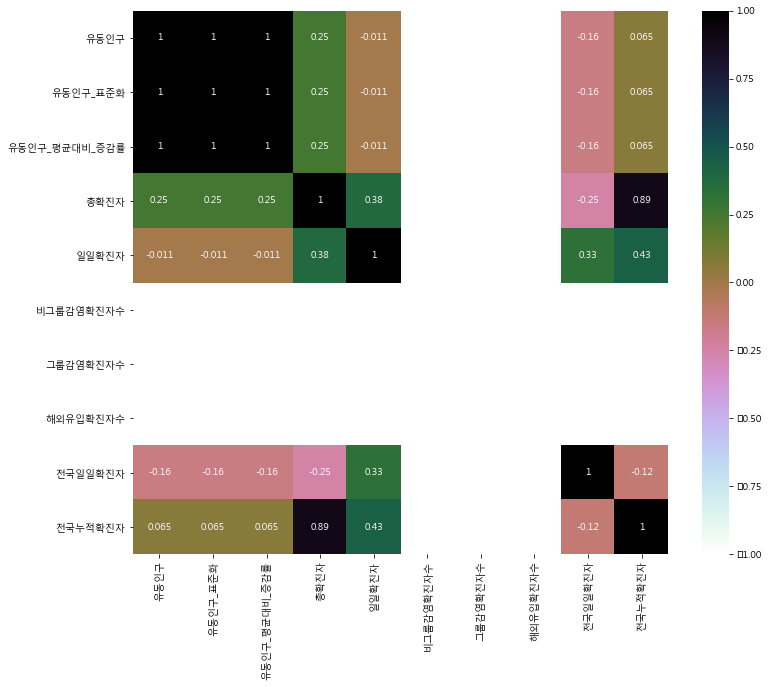

In [30]:

import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

plt.figure(figsize=(12,10))
sns.heatmap( groupTotal.corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap="cubehelix_r")
plt.show()

In [31]:
# card = pd.read_csv("card.csv")
# adstrd = pd.read_csv("adstrd_master.csv")

# # row 최대 출력 갯수 지정

# pd.options.display.max_rows=999

# # card 데이터 컬럼명 변경

# card.columns=['카드사용내역접수일자','행정동코드','행정동명','업종코드','업종명','매출발생건수','매출발생금액']

# # 행정동 정보 컬럼명 변경

# adstrd.columns=['행정동코드','동','시','구']

# # 행정동 코드를 int 타입으로 변경

# adstrd.행정동코드=adstrd.행정동코드.astype(int)

# # 행정동,시군구 데이터에서 서울 데이터만 추출

# adstrd_seoul=adstrd.loc[adstrd.시=="서울특별시"]

# # 서울 데이터 컬럼명 변경

# adstrd_seoul.columns=['행정동코드','행정동명','시','구']

# # card 데이터에서 행정동 코드를 추출하여 string 타입으로 변경
# code=card.행정동코드
# code=code.astype(str)

# # 문자 타입으로 변경한 행정동 코드를 시군구 데이터의 행정동코드와 같은 자릿수로 맞춰줌
# for i in range(len(code)):
#     code[i]=code[i][:8]
    
# # 바꿔준 행정동 코드를 다시 문자에서 정수 타입으로 변환한 뒤 데이터 프레임에 삽입

# code=code.astype(int)
# card.행정동코드=code

# # 행정동 데이터프레임과 카드 데이터 프레임을 행정동 코드를 기준으로 병합

# dong=pd.merge(adstrd_seoul, card, on='행정동코드', how='outer')

# # 불필요한 컬럼 제거 및 컬럼명 변경

# dong.drop(['행정동명_y'],axis=1, inplace=True)
# dong.rename(columns={'행정동명_x':'행정동명'}, inplace=True)

In [32]:
gubyul = move_people.groupby(by = ['년월일','행정구']).sum()['유동인구'].reset_index()

# 서울시 날짜별, 행정구별 유동인구

In [33]:
gubyul = move_people.groupby(by = ['년월일','행정구']).sum()['유동인구'].reset_index()
gubyul['년월일'] = pd.to_datetime(gubyul['년월일'],format='%Y%m%d')
gubyul = pd.merge(gubyul,t_provin_korea_cum,on=["년월일"],how="left")
gubyul = pd.merge(gubyul,p_info_korea,on=["년월일"],how="left")
gubyul

,년월일,행정구,유동인구,전국누적확진자,전국일일확진자
0,2020-01-01,강남구,3028808,NaN,NaN
1,2020-01-01,강동구,2094980,NaN,NaN
2,2020-01-01,강북구,945218,NaN,NaN
3,2020-01-01,강서구,2191177,NaN,NaN
4,2020-01-01,관악구,1694584,NaN,NaN
...,...,...,...,...,...
4195,2020-06-16,용산구,2363994,11569.0,40.0
4196,2020-06-16,은평구,1610731,11569.0,40.0
4197,2020-06-16,종로구,1992243,11569.0,40.0
4198,2020-06-16,중구,2253617,11569.0,40.0


In [34]:
p_info_seoul = p_info.loc[p_info['province']=='서울']
p_info_seoul

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,서울,강서구,overseas inflow,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,서울,중랑구,overseas inflow,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,서울,종로구,contact with patient,2002000001,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,서울,마포구,overseas inflow,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,서울,성북구,contact with patient,1000000002,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,1000001308,NaN,NaN,Korea,서울,마포구,Richway,1000001290,NaN,NaN,2020-06-29,NaN,NaN,isolated
1308,1000001309,NaN,NaN,Korea,서울,마포구,Richway,1000001290,NaN,NaN,2020-06-29,NaN,NaN,isolated
1309,1000001310,NaN,NaN,Korea,서울,금천구,contact with patient,NaN,NaN,NaN,2020-06-29,NaN,NaN,isolated
1310,1000001311,NaN,NaN,Korea,서울,기타,NaN,NaN,NaN,NaN,2020-06-29,NaN,NaN,isolated


In [35]:
p_info_seoul_oversea = p_info_seoul.loc[p_info_seoul['infection_case']=='overseas inflow']
p_info_seoul_oversea = p_info_seoul_oversea.groupby(by=['confirmed_date','city']).count()['province'].reset_index()
p_info_seoul_oversea = p_info_seoul_oversea.rename({'confirmed_date':'년월일','city':'행정구','province':'해외유입확진자수'},axis = 'columns')
p_info_seoul_oversea['년월일'] = pd.to_datetime(p_info_seoul_oversea['년월일'],format='%Y-%m-%d')
p_info_seoul_oversea

,년월일,행정구,해외유입확진자수
0,2020-01-23,강서구,1
1,2020-01-30,마포구,1
2,2020-01-30,중랑구,1
3,2020-02-02,기타,1
4,2020-02-05,송파구,1
...,...,...,...
236,2020-06-26,은평구,1
237,2020-06-26,중구,1
238,2020-06-27,양천구,1
239,2020-06-28,서초구,1


In [36]:
p_info_seoul_not_group = p_info_seoul[p_info_seoul['infection_case'].isin(['etc','contact with patient',np.nan])]
p_info_seoul_not_group = p_info_seoul_not_group.groupby(by=['confirmed_date','city']).count()['province'].reset_index()
p_info_seoul_not_group = p_info_seoul_not_group.rename({'confirmed_date':'년월일','city':'행정구','province':'비그룹감염확진자수'},axis = 'columns')
p_info_seoul_not_group['년월일'] = pd.to_datetime(p_info_seoul_not_group['년월일'],format='%Y-%m-%d')
p_info_seoul_not_group

,년월일,행정구,비그룹감염확진자수
0,2020-01-30,종로구,1
1,2020-01-31,성북구,1
2,2020-01-31,종로구,2
3,2020-02-05,성북구,1
4,2020-02-16,종로구,2
...,...,...,...
281,2020-06-28,기타,1
282,2020-06-28,용산구,1
283,2020-06-29,금천구,1
284,2020-06-29,기타,1


In [37]:
p_info_seoul_group = p_info_seoul[~p_info_seoul['infection_case'].isin(['etc','contact with patient','overseas inflow',np.nan])]
p_info_seoul_group = p_info_seoul_group.groupby(by=['confirmed_date','city']).count()['province'].reset_index()
p_info_seoul_group = p_info_seoul_group.rename({'confirmed_date':'년월일','city':'행정구','province':'그룹감염확진자수'},axis='columns')
p_info_seoul_group['년월일'] = pd.to_datetime(p_info_seoul_group['년월일'],format='%Y-%m-%d')
p_info_seoul_group

,년월일,행정구,그룹감염확진자수
0,2020-02-19,성동구,1
1,2020-02-20,성동구,1
2,2020-02-21,서대문구,1
3,2020-02-21,서초구,1
4,2020-02-22,강동구,1
...,...,...,...
399,2020-06-27,영등포구,1
400,2020-06-28,구로구,1
401,2020-06-28,노원구,1
402,2020-06-28,송파구,1


In [38]:
gubyul2 = pd.merge(gubyul,p_info_seoul_oversea,on=['년월일','행정구'],how="left")
gubyul2 = pd.merge(gubyul2, p_info_seoul_not_group,on=['년월일','행정구'],how="left")
gubyul2 = pd.merge(gubyul2, p_info_seoul_group, on=['년월일','행정구'],how="left")

gubyul2 = gubyul2.fillna(0)

In [39]:
gubyul2_backup = gubyul2
# gubyul2 backupfile


# 명코

In [40]:
card_raw = pd.read_csv("./card.csv")

In [41]:
card = card_raw
card.shape

(3777647, 7)

## 데이터 전처리

In [42]:
card.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200104,1174066000,성내3동,7041,약국,463,5843230
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550
2,20200104,1174066000,성내3동,7021,한의원,53,4589800
3,20200104,1174066000,성내3동,7020,의원,339,9267240
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000


In [43]:
# 컬럼 최대 출력 갯수 지정

pd.options.display.max_rows=999

In [44]:
# 데이터 오류 제거
errvals = ["석재", "커텐", "영상물", "복지매장", "축협직영매장"]

for errval in errvals:
    card = card.drop( card[card["selng_cascnt"] == errval].index )

# 구매건수, 구매총액 string type to int64
card["selng_cascnt"] = card["selng_cascnt"].astype("int64") 
card["salamt"] = card["salamt"].astype("int64") 

# 날짜 데이터 int type to datetime
card["receipt_dttm"] = pd.to_datetime(card["receipt_dttm"], format="%Y%m%d")

# '가맹점업종코드 앞 한 자리' 칼럼 추가(업종별로 묶기 위함)
card['mrhst_induty_cl_code'] = card['mrhst_induty_cl_code'].astype(str)
card['mrhst_induty_clm_code'] = card['mrhst_induty_cl_code'].str.slice(start=0, stop=1)

# 가맹점업종코드 앞 한 자리' 칼럼 순서 변경
card = card[['receipt_dttm',  'adstrd_code', 'adstrd_nm','mrhst_induty_clm_code', 'mrhst_induty_cl_code',
       'mrhst_induty_cl_nm', 'selng_cascnt', 'salamt']]

# 띄어쓰기 제거
card.mrhst_induty_cl_nm = card.mrhst_induty_cl_nm.str.replace(' ', '')

# 칼럼명 변경
card.columns=['카드사용접수일', '행정동코드', '가맹점행정동명', '가맹점업종코드앞자리', '가맹점업종코드', '가맹점업종명',
              '매출발생건수', '매출발생금액']

In [45]:
# 행정동코드를 다른 데이터와 같게 자릿수를 맞춰줌
card['행정동코드']=card.행정동코드.astype(str)
card['행정동코드']=card.행정동코드.str.slice(start=0,stop=8)
card['행정동코드']=card.행정동코드.astype('int64')

In [46]:
# 가맹점 업종 대분류
# 가맹점 업종 코드 앞자리에 따라 분류
card_s={1:'관광',2:'취미',3:'생활',4:'쇼핑',5:'교육',6:'차량',7:'의료',8:'음식',9:'기타'}

In [47]:
card.head()

,카드사용접수일,행정동코드,가맹점행정동명,가맹점업종코드앞자리,가맹점업종코드,가맹점업종명,매출발생건수,매출발생금액
0,2020-01-04,11740660,성내3동,7,7041,약국,463,5843230
1,2020-01-04,11740660,성내3동,7,7022,치과의원,33,7835550
2,2020-01-04,11740660,성내3동,7,7021,한의원,53,4589800
3,2020-01-04,11740660,성내3동,7,7020,의원,339,9267240
4,2020-01-04,11740660,성내3동,6,6110,자동차정비,19,4441000


### 행정동 데이터와 카드 데이터 병합

In [48]:
adstrd = pd.read_csv("./adstrd_master.csv")

In [49]:
adstrd.columns=['행정동코드','동','시','구']

In [50]:
# float 타입인 행정동코드를 int타입으로 변경
adstrd.행정동코드=adstrd.행정동코드.astype('int64')

# 서울시 데이터만 뽑아서 데이터 프레임으로 생성
adstrd_seoul=adstrd.loc[adstrd.시=="서울특별시"]
adstrd_seoul.columns=['행정동코드','행정동명','시','구']

In [51]:
adstrd_seoul

,행정동코드,행정동명,시,구
0,11110515,청운효자동,서울특별시,종로구
1,11110530,사직동,서울특별시,종로구
2,11110540,삼청동,서울특별시,종로구
3,11110550,부암동,서울특별시,종로구
4,11110560,평창동,서울특별시,종로구
5,11110570,무악동,서울특별시,종로구
6,11110580,교남동,서울특별시,종로구
7,11110600,가회동,서울특별시,종로구
8,11110615,종로1.2.3.4가동,서울특별시,종로구
9,11110630,종로5.6가동,서울특별시,종로구


In [52]:
# 카드 데이터와 행정동 데이터를 행정동코드 기준으로 병합

card_gu=pd.merge(adstrd_seoul, card, on='행정동코드', how='outer')

In [53]:
card_gu

,행정동코드,행정동명,시,구,카드사용접수일,가맹점행정동명,가맹점업종코드앞자리,가맹점업종코드,가맹점업종명,매출발생건수,매출발생금액
0,11110515,청운효자동,서울특별시,종로구,2020-01-04,청운효자동,9,9210,세탁소,10,107370
1,11110515,청운효자동,서울특별시,종로구,2020-01-04,청운효자동,8,8399,기타음료식품,55,903270
2,11110515,청운효자동,서울특별시,종로구,2020-01-04,청운효자동,8,8301,제과점,104,1352260
3,11110515,청운효자동,서울특별시,종로구,2020-01-04,청운효자동,8,8021,스넥,109,2320200
4,11110515,청운효자동,서울특별시,종로구,2020-01-04,청운효자동,8,8013,주점,16,911300
...,...,...,...,...,...,...,...,...,...,...,...
3713947,11740700,둔촌2동,서울특별시,강동구,2020-06-14,둔촌2동,7,7101,이용원,1,25000
3713948,11740700,둔촌2동,서울특별시,강동구,2020-06-14,둔촌2동,2,2199,기타레져업,161,765700
3713949,11740700,둔촌2동,서울특별시,강동구,2020-06-14,둔촌2동,7,7111,미용재료,2,50000
3713950,11740700,둔촌2동,서울특별시,강동구,2020-06-14,둔촌2동,7,7001,종합병원,20,5335390


### 쇼핑 관련 데이터 추출

In [54]:
# 가맹점 업종 코드를 앞에 2자리만 남기게 slicing
card_gu['가맹점업종코드두자리']=card_gu['가맹점업종코드'].str.slice(start=0, stop=2)

In [55]:
card_gu.가맹점업종코드두자리.unique()

array(['92', '83', '80', '70', '42', '40', '22', '71', '51', '44', '90',
       '50', '32', '20', '52', '91', '61', '99', '21', '93', '34', '10',
       '60', '30', '96', '11', '43', '84', '81', '82', '62', '33', '41',
       '31', '95'], dtype=object)

In [72]:
for i in card_gu.가맹점업종코드두자리.unique():
    globals()['card_shopping_{}'.format(i)] =  pd.DataFrame(card_gu.loc[card_gu['가맹점업종코드두자리']==i])
    globals()['card_shopping_{}'.format(i)] = globals()['card_shopping_{}'.format(i)].reset_index().rename({'카드사용접수일':'년월일','구':'행정구'},axis='columns')
    globals()['card_shopping_{}'.format(i)] =  globals()['card_shopping_{}'.format(i)].groupby(by = ['년월일','행정구']).sum()['매출발생건수'].reset_index()
    globals()['card_shopping_{}'.format(i)] =  globals()['card_shopping_{}'.format(i)].rename({'매출발생건수':i},axis='columns')

In [71]:
# card_shopping_92 =  card_gu.loc[card_gu['가맹점업종코드두자리']=='92']
# card_shopping_92 = card_shopping_92.reset_index().rename({'카드사용접수일':'년월일','구':'행정구'},axis='columns')
# card_shopping_92 =  card_shopping_92.groupby(by = ['년월일','행정구']).sum()['매출발생건수'].reset_index()
# card_shopping_92 = card_shopping_92.reset_index().rename({'매출발생건수':i},axis='columns')

In [76]:
for i in card_gu.가맹점업종코드두자리.unique():
    gubyul2 = pd.merge(gubyul2, globals()['card_shopping_{}'.format(i)],on=['년월일','행정구'],how='left' )

-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-


In [82]:
gubyul3 = gubyul2.loc[gubyul2['년월일']>pd.to_datetime('20200105',format='%Y-%m-%d'),:]
gubyul3 = gubyul3.loc[gubyul3['년월일']<pd.to_datetime('20200415',format='%Y-%m-%d'),:]
gubyul3

,년월일,행정구,유동인구,전국누적확진자,전국일일확진자,해외유입확진자수,비그룹감염확진자수,그룹감염확진자수,92,83,...,11,43,84,81,82,62,33,41,31,95
125,2020-01-06,강남구,4935450,0.0,0.0,0.0,0.0,0.0,NaN,8248.0,...,NaN,25.0,NaN,58.0,30.0,4063.0,416.0,NaN,157.0,NaN
126,2020-01-06,강동구,2346405,0.0,0.0,0.0,0.0,0.0,NaN,4665.0,...,NaN,NaN,NaN,179.0,83.0,NaN,NaN,NaN,NaN,NaN
127,2020-01-06,강북구,1018556,0.0,0.0,0.0,0.0,0.0,NaN,1208.0,...,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN
128,2020-01-06,강서구,2508887,0.0,0.0,0.0,0.0,0.0,8.0,5932.0,...,7481.0,NaN,NaN,305.0,65.0,NaN,316.0,NaN,NaN,NaN
129,2020-01-06,관악구,1975404,0.0,0.0,0.0,0.0,0.0,36.0,5426.0,...,NaN,NaN,NaN,470.0,13.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,2020-04-14,용산구,2145382,10175.0,20.0,0.0,0.0,0.0,321.0,8069.0,...,30.0,1.0,26.0,NaN,1.0,741.0,656.0,84788.0,427.0,NaN
2621,2020-04-14,은평구,1455284,10175.0,20.0,0.0,0.0,0.0,396.0,6171.0,...,1.0,10.0,32.0,NaN,NaN,NaN,1776.0,8.0,93.0,NaN
2622,2020-04-14,종로구,1758894,10175.0,20.0,0.0,0.0,0.0,147.0,4286.0,...,39.0,127.0,77.0,2.0,1.0,11811.0,336.0,567.0,217.0,NaN
2623,2020-04-14,중구,1940277,10175.0,20.0,0.0,0.0,0.0,151.0,6149.0,...,229051.0,64.0,57.0,2.0,1.0,19553.0,485.0,378.0,138.0,NaN


In [86]:
corr = gubyul3.corr(method='pearson')
print(corr)

               유동인구   전국누적확진자   전국일일확진자  해외유입확진자수  비그룹감염확진자수  그룹감염확진자수  \
유동인구       1.000000 -0.090077 -0.101127  0.171570   0.025172 -0.029501   
전국누적확진자   -0.090077  1.000000  0.409726  0.266825   0.160526  0.080737   
전국일일확진자   -0.101127  0.409726  1.000000  0.097051   0.164919  0.149397   
해외유입확진자수   0.171570  0.266825  0.097051  1.000000   0.135126 -0.022868   
비그룹감염확진자수  0.025172  0.160526  0.164919  0.135126   1.000000  0.028730   
그룹감염확진자수  -0.029501  0.080737  0.149397 -0.022868   0.028730  1.000000   
92         0.544118  0.181363  0.138420  0.249622   0.099471  0.011543   
83         0.492893  0.044320  0.016400  0.103481   0.023966 -0.013859   
80         0.686134 -0.068823 -0.072267  0.132967   0.026392 -0.035422   
70         0.592533  0.093444  0.073179  0.216390   0.083811  0.002991   
42         0.393248 -0.049577 -0.128974  0.062008  -0.003892 -0.037002   
40         0.363196  0.023463  0.036054  0.101463  -0.001985  0.037720   
22         0.203885 -0.079997 -0.05065

['Malgun Gothic']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


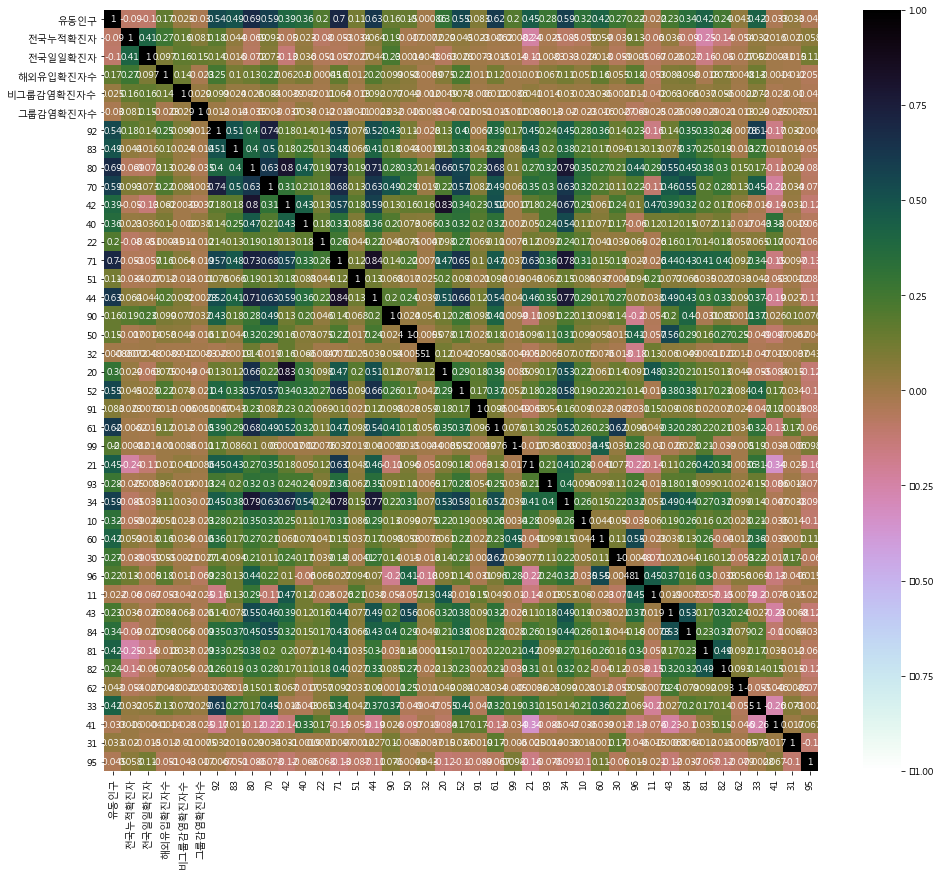

In [83]:
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

plt.figure(figsize=(16,14))
sns.heatmap( gubyul3.corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap="cubehelix_r")
plt.show()

In [84]:
gubyul4 = gubyul2.loc[gubyul2['년월일']>pd.to_datetime('20200414',format='%Y-%m-%d'),:]

In [87]:
corr = gubyul4.corr(method='pearson')
print(corr)

               유동인구   전국누적확진자   전국일일확진자  해외유입확진자수  비그룹감염확진자수  그룹감염확진자수  \
유동인구       1.000000  0.076536  0.098541  0.056081   0.005522  0.008599   
전국누적확진자    0.076536  1.000000  0.716847  0.006932   0.196263  0.221510   
전국일일확진자    0.098541  0.716847  1.000000  0.028690   0.176370  0.295354   
해외유입확진자수   0.056081  0.006932  0.028690  1.000000  -0.028185  0.003198   
비그룹감염확진자수  0.005522  0.196263  0.176370 -0.028185   1.000000  0.086563   
그룹감염확진자수   0.008599  0.221510  0.295354  0.003198   0.086563  1.000000   
92         0.594870  0.044676  0.036796 -0.002851  -0.012764  0.025189   
83         0.394219  0.069076  0.060743  0.002894  -0.026437 -0.033867   
80         0.672764  0.062338  0.069487  0.014162  -0.021495 -0.034387   
70         0.618553  0.023675  0.093617  0.016049  -0.011040 -0.002260   
42         0.358412  0.133321  0.075932 -0.009346  -0.010196 -0.034920   
40         0.377522  0.016366  0.032166  0.052173   0.004288  0.002501   
22         0.557721 -0.060344 -0.01139

['Malgun Gothic']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


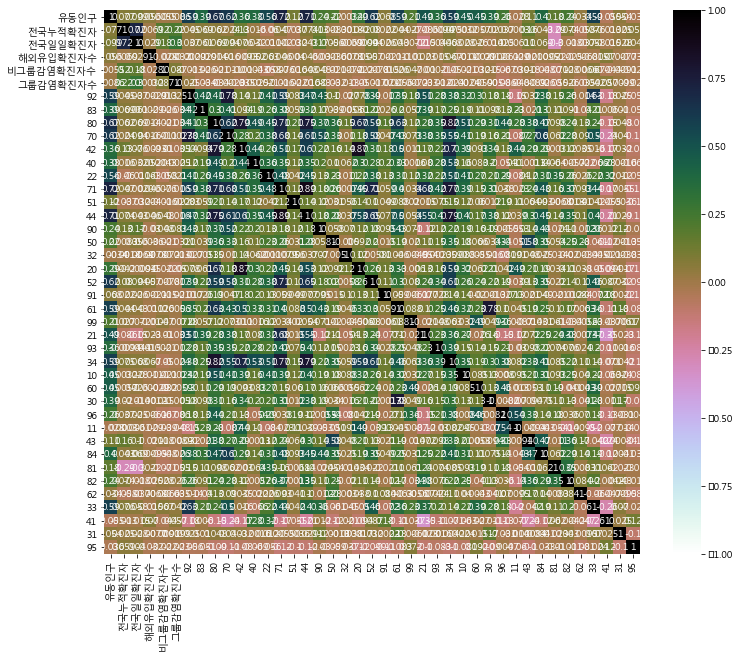

In [85]:
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

plt.figure(figsize=(12,10))
sns.heatmap( gubyul4.corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap="cubehelix_r")
plt.show()